In [106]:
%matplotlib inline
import mne
import matplotlib.pyplot as plt

In [107]:
!pip install --upgrade mne


In [108]:
fname=r'C:\Users\vishw\Downloads\oddball_example_small-fif.gz'

## read in raw data; raw objects

In [109]:
raw=mne.io.read_raw_fif(fname)

Opening raw data file C:\Users\vishw\Downloads\oddball_example_small-fif.gz...


C:\Users\vishw\AppData\Local\Temp\ipykernel_13000\1913115300.py:1: RuntimeWarning: This filename (C:\Users\vishw\Downloads\oddball_example_small-fif.gz) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw=mne.io.read_raw_fif(fname)


Isotrak not found
    Range : 2903 ... 112000 =     29.030 ...  1120.000 secs
Ready.


In [110]:
raw.info.get('nchan')

64

In [111]:
raw=mne.io.read_raw_fif(fname,preload=True) #to load the data to memory

Opening raw data file C:\Users\vishw\Downloads\oddball_example_small-fif.gz...


C:\Users\vishw\AppData\Local\Temp\ipykernel_13000\1179493626.py:1: RuntimeWarning: This filename (C:\Users\vishw\Downloads\oddball_example_small-fif.gz) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw=mne.io.read_raw_fif(fname,preload=True) #to load the data to memory


Isotrak not found
    Range : 2903 ... 112000 =     29.030 ...  1120.000 secs
Ready.
Reading 0 ... 109097  =      0.000 ...  1090.970 secs...


In [112]:
raw.filter(1,20)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 331 samples (3.310 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    0.4s finished


<Raw | oddball_example_small-fif.gz, 64 x 109098 (1091.0 s), ~53.3 MB, data loaded>

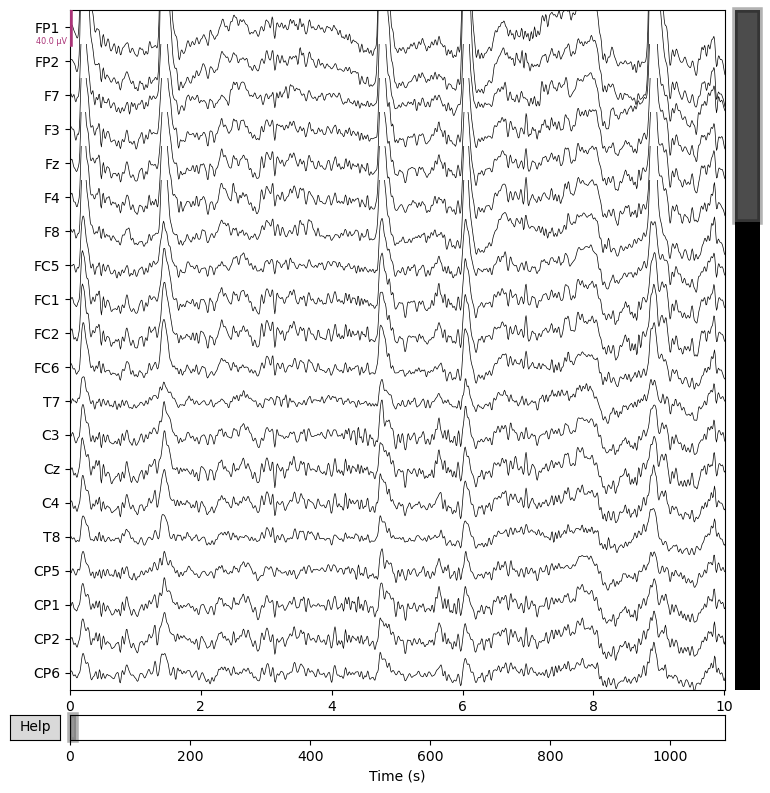

In [113]:
raw.plot()
plt.show()

In [114]:
ica=mne.preprocessing.ICA(n_components=20,random_state=0) #to remove eog artifacts,These lines perform Independent Component Analysis (ICA) on the raw data to identify independent components representing neural and non-neural sources of activity. The n_components parameter specifies the number of components to estimate, and random_state ensures reproducibility.

In [115]:
ica.fit(raw.copy().filter(8,35))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 165 samples (1.650 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 63 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    0.5s finished


Selecting by number: 20 components
Fitting ICA took 8.8s.


<ICA | raw data decomposition, method: fastica (fit in 72 iterations on 109098 samples), 20 ICA components (63 PCA components available), channel types: eeg, no sources marked for exclusion>

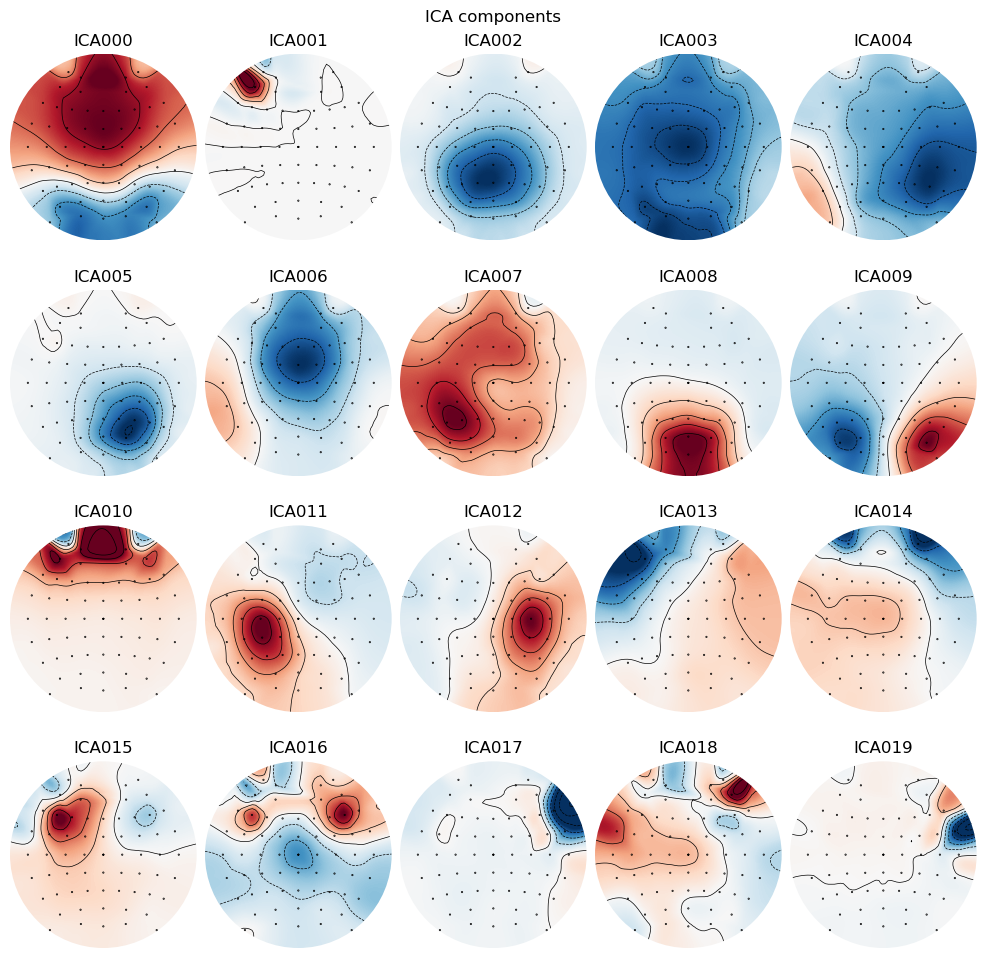

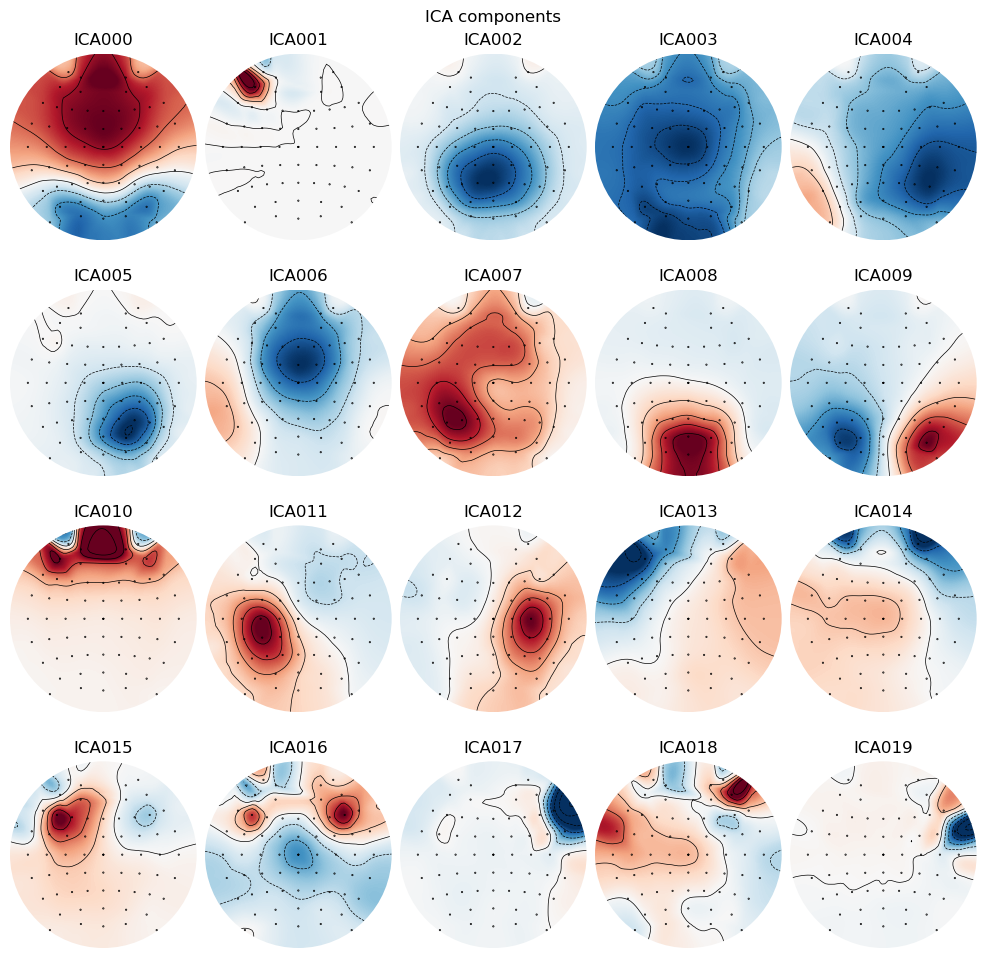

In [116]:
ica.plot_components()


In [117]:
ica.exclude=[1,10,14,17,18,19]

In [118]:
bad_idx,scores=ica.find_bads_eog(raw,'SO2',threshold=2)
print(bad_idx)

Using EOG channel: SO2
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1000 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1000 samples (10.000 s)

[14, 10]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


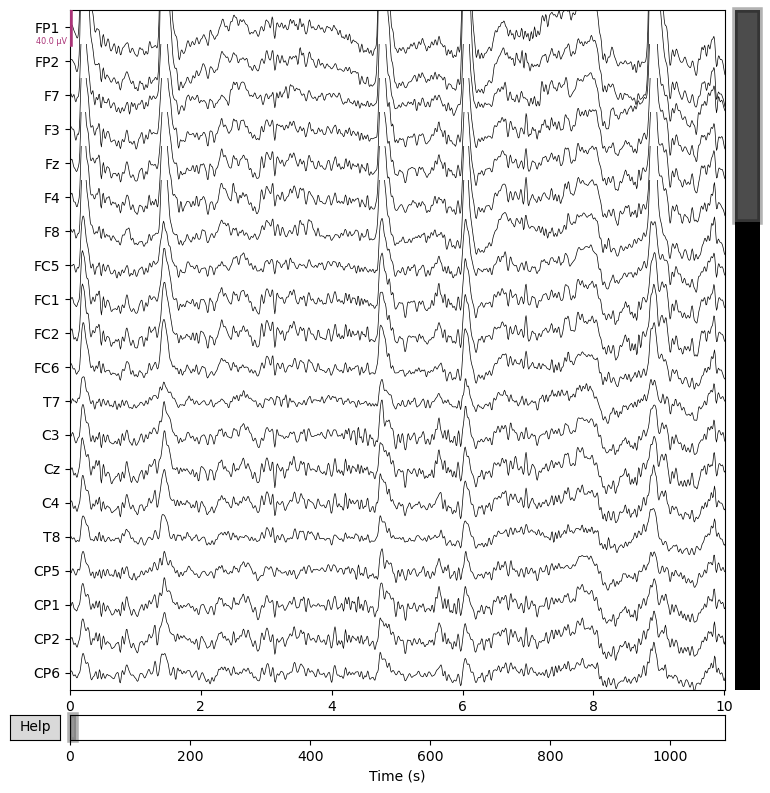

In [119]:
raw.plot()
plt.show()

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 63 PCA components


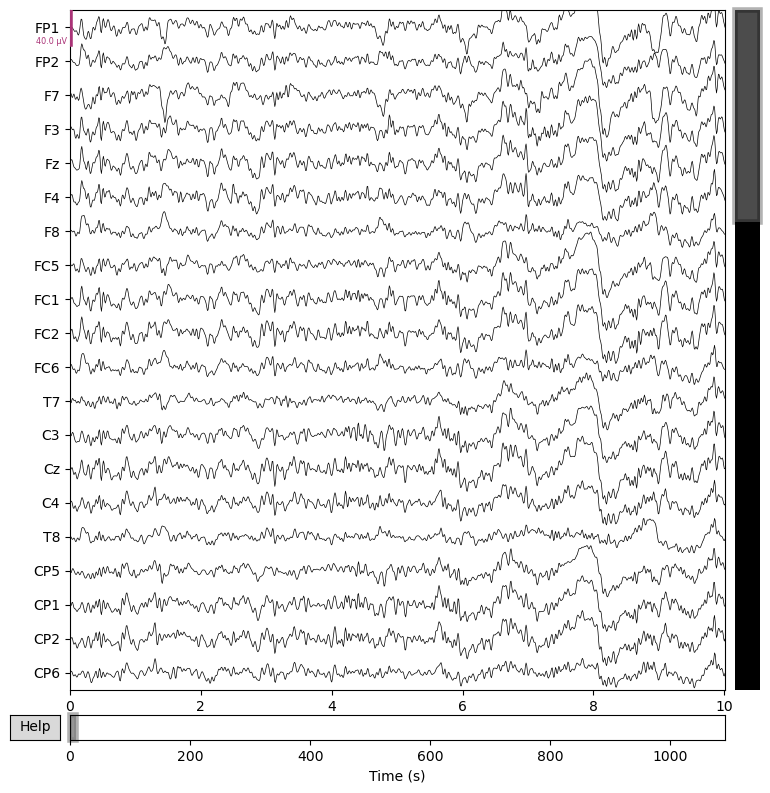

In [120]:
ica.apply(raw.copy(),exclude=ica.exclude).plot()
plt.show()

## EPOCHS

In [121]:
events=mne.find_events(raw)

903 events found on stim channel STI 014
Event IDs: [100 200]


In [122]:
events

array([[  3241,      0,    200],
       [  3437,      0,    200],
       [  3643,      0,    200],
       ...,
       [111496,      0,    200],
       [111613,      0,    200],
       [111719,      0,    200]], dtype=int64)

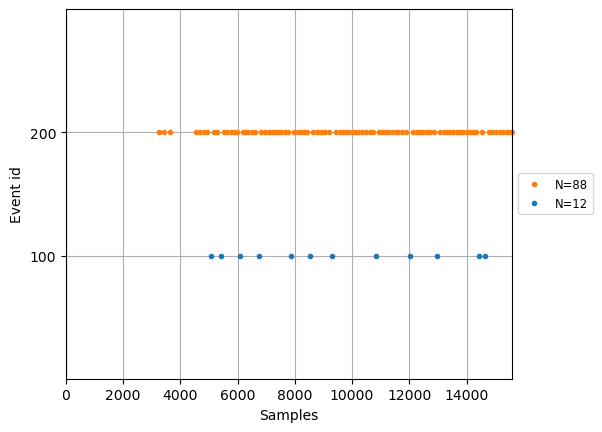

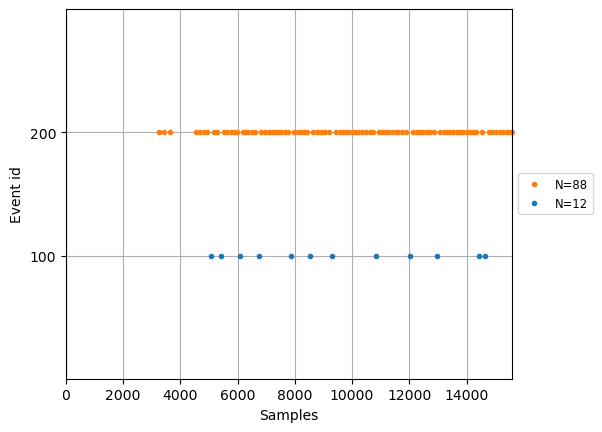

In [123]:
mne.viz.plot_events(events[:100])

In [124]:
event_ids={"standard/stimulus":200,"target/stimulus":100}
epochs=mne.Epochs(raw,events,event_id=event_ids,preload=True) #In summary, events in EEG/MEG data represent key moments or occurrences in an experimenta

Not setting metadata
903 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 903 events and 71 original time points ...
0 bad epochs dropped


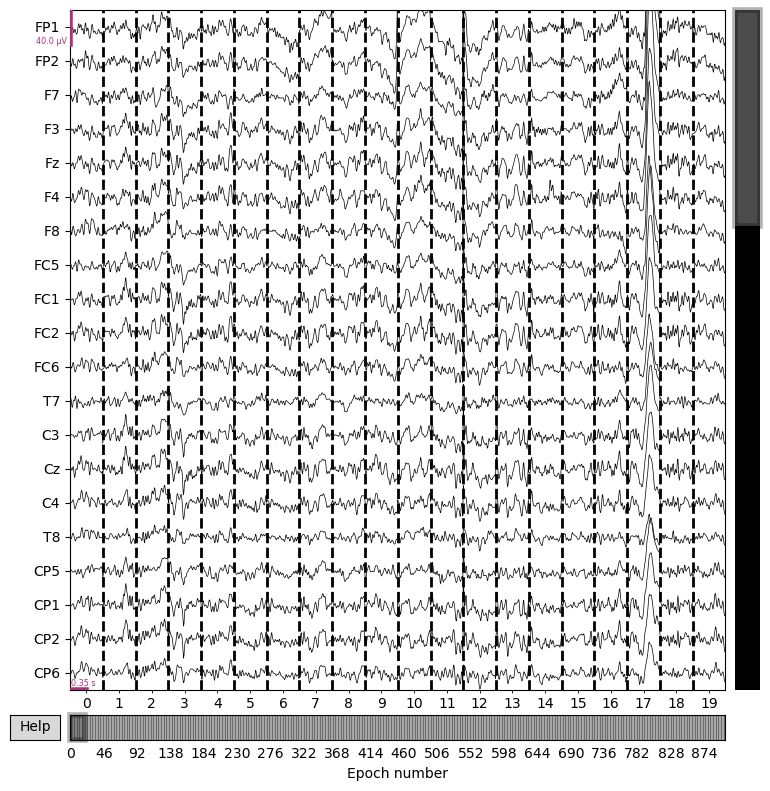

In [125]:
epochs.plot()
plt.show() 
#This line creates epochs from the raw data based on the detected events and event IDs. Epochs are segments of continuous EEG/MEG data that are time-locked to specific events or stimuli.

In [126]:
epochs=ica.apply(epochs,exclude=ica.exclude)

Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 63 PCA components


C:\Users\vishw\AppData\Local\Temp\ipykernel_13000\305008437.py:1: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs=ica.apply(epochs,exclude=ica.exclude)


In [127]:
epochs["target"]

<Epochs |  106 events (all good), -0.2 – 0.5 s, baseline -0.2 – 0 s, ~3.7 MB, data loaded,
 'target/stimulus': 106>

In [128]:
epochs["stimulus"]

<Epochs |  903 events (all good), -0.2 – 0.5 s, baseline -0.2 – 0 s, ~31.4 MB, data loaded,
 'standard/stimulus': 797
 'target/stimulus': 106>

In [129]:
epochs.info

<Info | 10 non-empty values
 bads: []
 ch_names: FP1, FP2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
 chs: 63 EEG, 1 Stimulus
 custom_ref_applied: True
 file_id: 4 items (dict)
 highpass: 1.0 Hz
 lowpass: 20.0 Hz
 meas_date: 2017-08-10 20:05:16 UTC
 meas_id: 4 items (dict)
 nchan: 64
 projs: []
 sfreq: 100.0 Hz
>

Not setting metadata
106 matching events found
No baseline correction applied
0 projection items activated


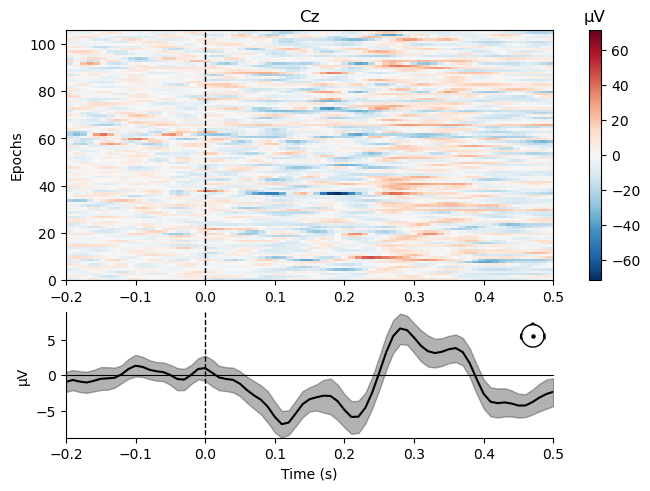

[<Figure size 640x480 with 4 Axes>]

In [130]:
epochs["target"].plot_image(picks=[13])

In [132]:
epochs.equalize_event_counts(event_ids)#to ensure we have as many oddballs as standard trials
epochs

Dropped 0 epochs: 


<Epochs |  212 events (all good), -0.2 – 0.5 s, baseline -0.2 – 0 s, ~7.4 MB, data loaded,
 'standard/stimulus': 106
 'target/stimulus': 106>

## Second Video

## Evoked

In [133]:
target=epochs["target"].average()
target

<Evoked | 'target/stimulus' (average, N=106), -0.2 – 0.5 s, baseline -0.2 – 0 s, 63 ch, ~91 kB>

In [134]:
standard=epochs["standard"].average()

In [135]:
epochs.get_data().shape #number of epochs, the number of channels, and the number of time points, respectively.

C:\Users\vishw\AppData\Local\Temp\ipykernel_13000\1782495479.py:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs.get_data().shape #number of epochs, the number of channels, and the number of time points, respectively.


(212, 64, 71)

In [136]:
epochs["target"].get_data().shape

C:\Users\vishw\AppData\Local\Temp\ipykernel_13000\964812751.py:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs["target"].get_data().shape


(106, 64, 71)

In [138]:
target.data.shape #The dimensions correspond to the number of channels and the number of time points.

(63, 71)

In [80]:
target.info

<Info | 10 non-empty values
 bads: []
 ch_names: FP1, FP2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
 chs: 63 EEG
 custom_ref_applied: True
 file_id: 4 items (dict)
 highpass: 1.0 Hz
 lowpass: 20.0 Hz
 meas_date: 2017-08-10 20:05:16 UTC
 meas_id: 4 items (dict)
 nchan: 63
 projs: []
 sfreq: 100.0 Hz
>

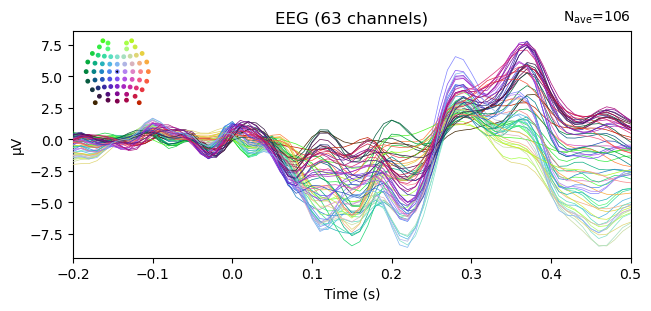

In [82]:
target.plot();

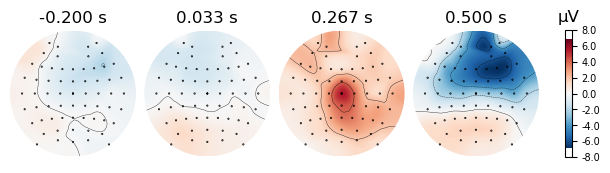

In [83]:
target.plot_topomap();

No projector specified for this dataset. Please consider the method self.add_proj.


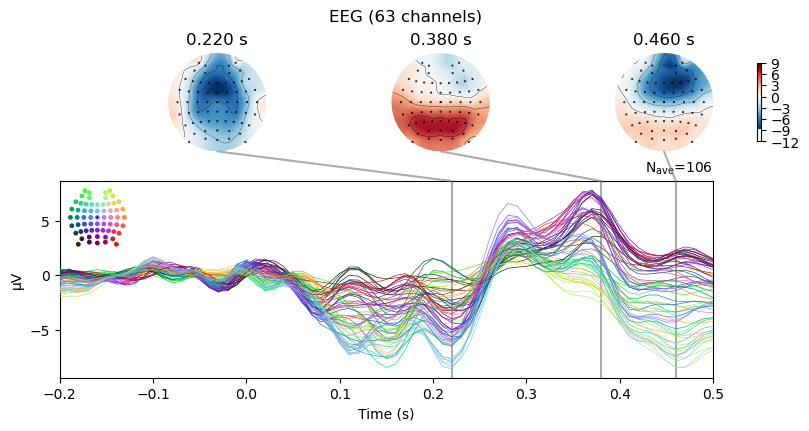

In [84]:
target.plot_joint();

No projector specified for this dataset. Please consider the method self.add_proj.


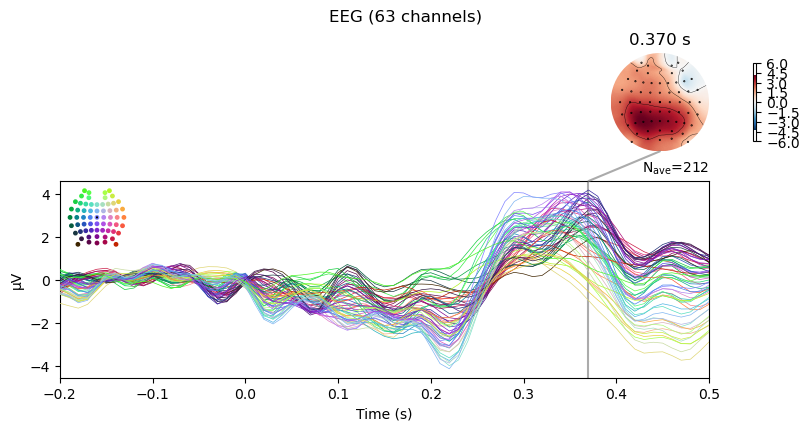

In [87]:
diff=mne.combine_evoked((target,-standard),weights='equal') #This line computes the difference between the average evoked responses for the "target" and "standard" conditions.
diff.plot_joint(times=0.37);

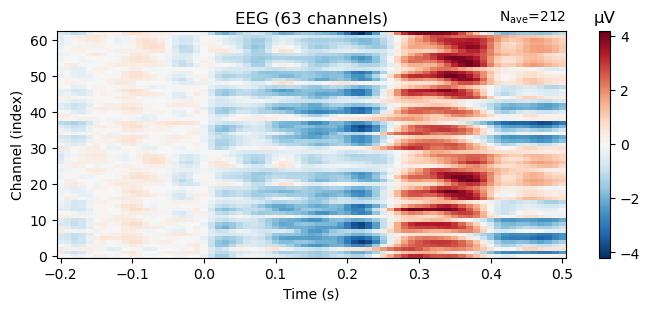

In [88]:
diff.plot_image();

In [89]:
rois=mne.channels.make_1020_channel_selections(diff.info,midline="z12") #This line creates regions of interest (ROIs) based on the channel layout information stored in the diff object. It divides the channels into groups based on the 10-20 system of electrode placement, with a midline reference at "z12".

In [90]:
rois

{'Left': array([25, 57, 58, 20, 53, 21, 48, 16, 49, 12, 44, 11, 40,  7, 39,  3, 34,
         2, 31, 30]),
 'Midline': array([27, 28, 26, 59, 54, 55, 22, 17, 18, 50, 46, 13, 45, 62,  9,  8,  4,
        36, 35,  1,  0, 38, 43]),
 'Right': array([29, 61, 60, 24, 56, 23, 52, 19, 51, 14, 15, 47, 41, 10, 42,  5, 37,
         6, 32, 33])}

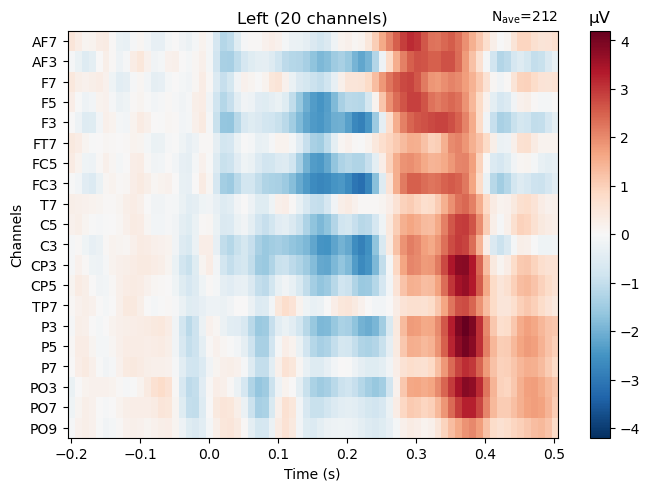

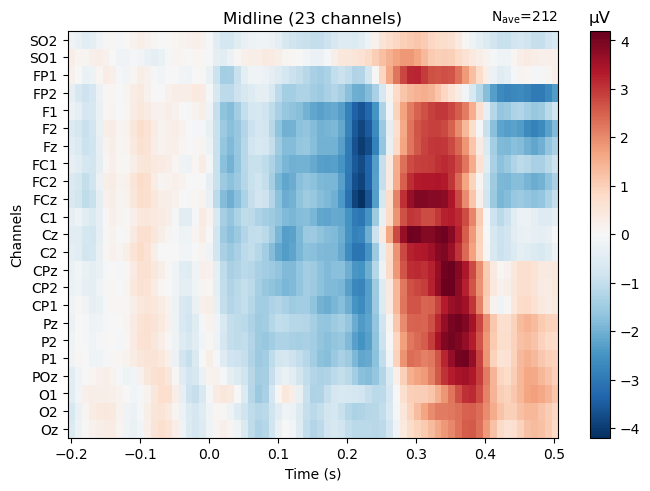

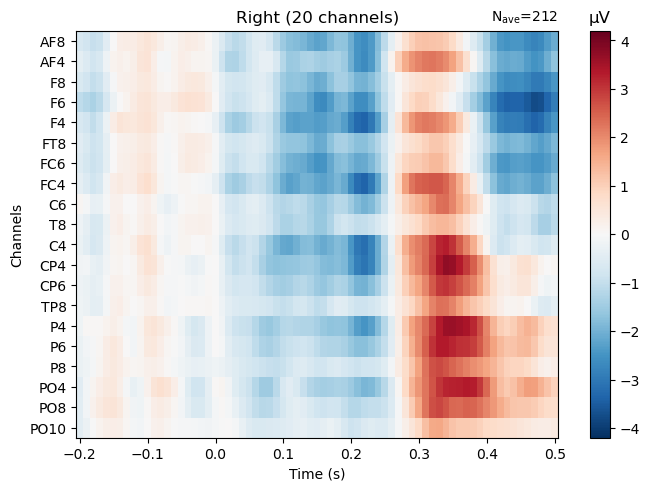

In [92]:
diff.plot_image(group_by=rois,show=False,show_names="all");

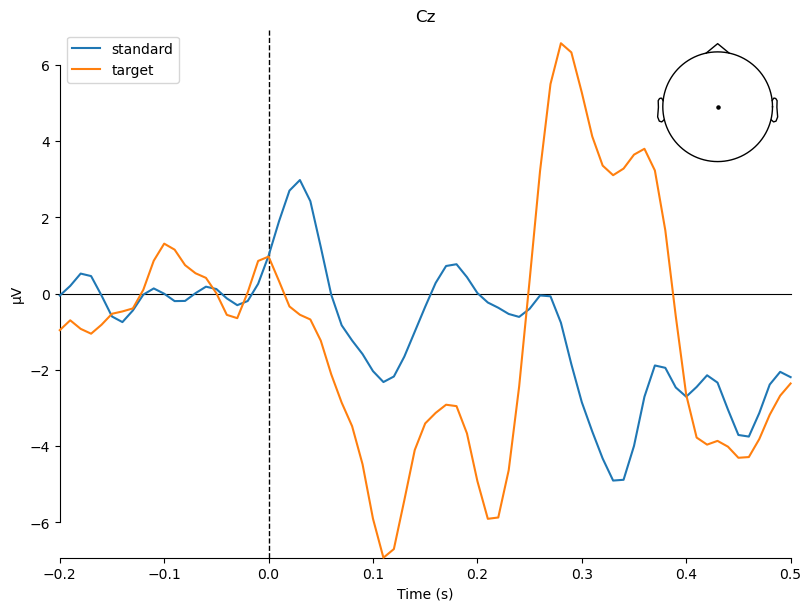

In [93]:
mne.viz.plot_compare_evokeds({"standard":standard,"target":target},picks=[13]);

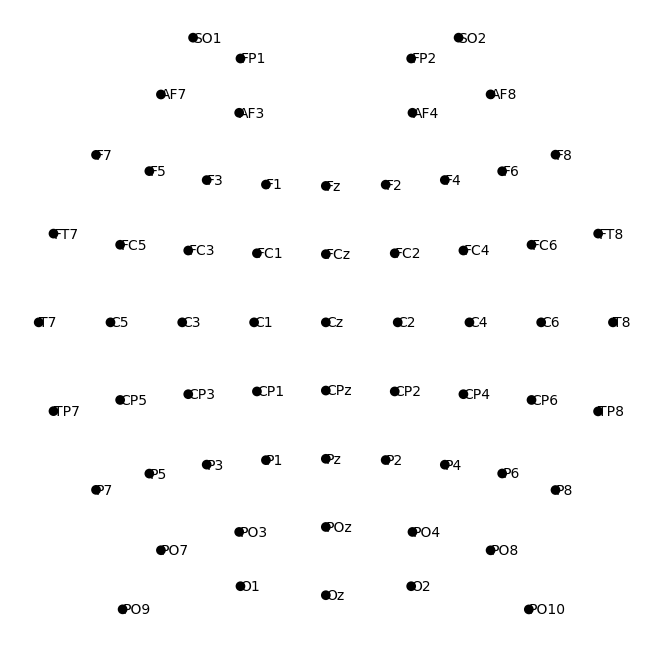

In [94]:
target.plot_sensors(show_names=True);

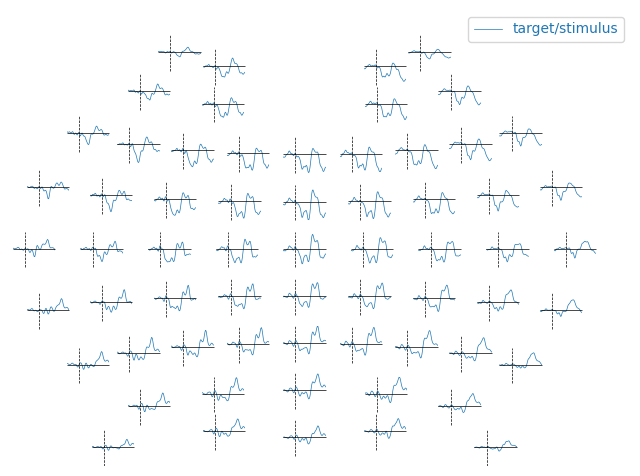

In [95]:
target.plot_topo();

## Time-Frequency stuff

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs...


C:\Users\vishw\AppData\Local\Temp\ipykernel_13000\325639607.py:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  epochs.plot_psd(fmin=0,fmax=40)
C:\Users\vishw\anaconda3\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


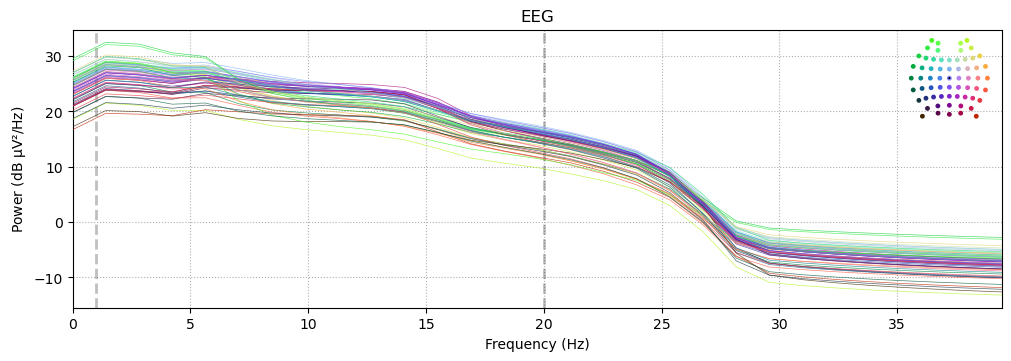

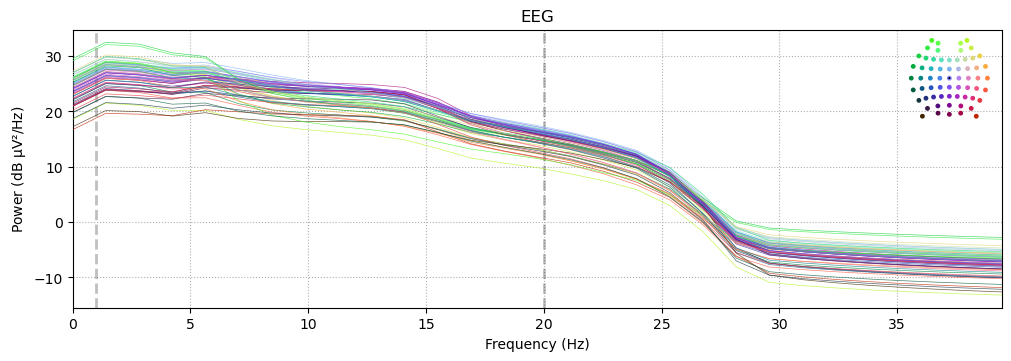

In [97]:
epochs.plot_psd(fmin=0,fmax=40)

In [98]:
from mne.time_frequency import tfr_morlet

In [101]:
# freqs=list(range(3,20))
# tfr_target=tfr_morlet(epochs["target"],freqs,3,return_itc=False)
# tfr_standard=tfr_morlet(epochs["standard"],freqs,3,return_itc=False)

# Third Video

## overview of artifact and noise detection

In [18]:
import os
import numpy as np
import mne
import matplotlib.pyplot as plt
sample_data_folder=mne.datasets.sample.data_path()
sample_data_raw_file=os.path.join(sample_data_folder,'MEG','sample','sample_audvis_raw.fif')

raw=mne.io.read_raw_fif(sample_data_raw_file)
raw.crop(0,60).load_data() #just use a fraction of data for speed

Opening raw data file C:\Users\vishw\mne_data\MNE-sample-data\MEG\sample\sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 36037  =      0.000 ...    60.000 secs...


<Raw | sample_audvis_raw.fif, 376 x 36038 (60.0 s), ~106.6 MB, data loaded>

## low frequency drifts

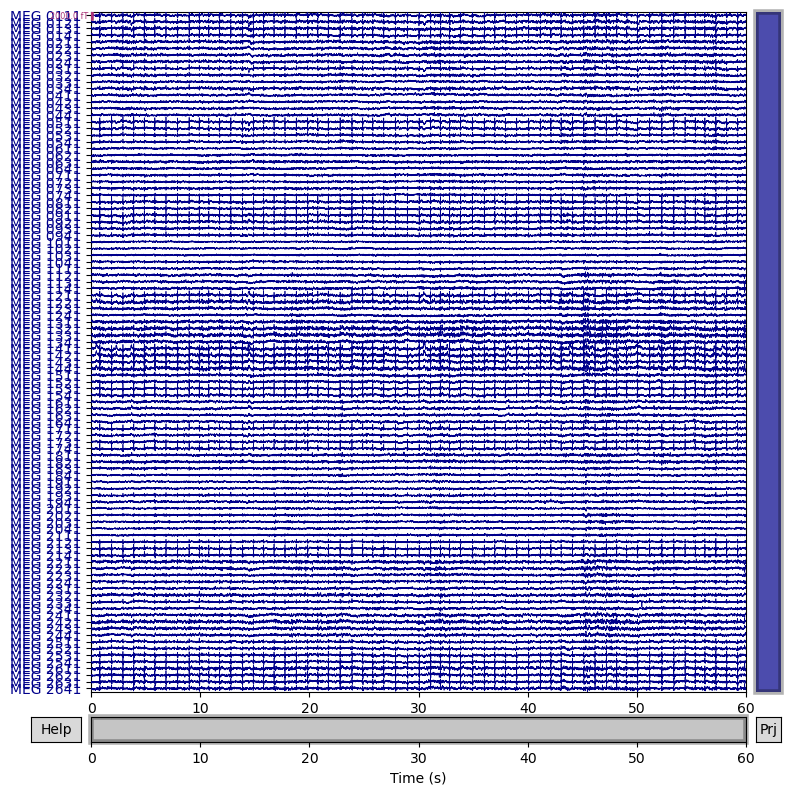

In [4]:
mag_channels=mne.pick_types(raw.info,meg='mag')
raw.plot(duration=60,order=mag_channels,n_channels=len(mag_channels),
         remove_dc=False);

## powerline noise

In [24]:
fig=raw.plot_psd(tmax=np.inf,fmax=250,average=True)
for ax in fig.axes[:2]:
    freqs=ax.lines[-1].get_xdata()
    psds=ax.lines[-1].get_ydata()
    for freq in (60,120,180,240):
        idx=np.searchsorted(freqs,freq)
        ax.arrow(x=freqs[idx],y=psds[idx]+18,dx=0,dy=-12,color='red',
                 width=0.1,head_width=3,length_includes_head=True)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 3.410 (s)
Plotting power spectral density (dB=True).


C:\Users\vishw\AppData\Local\Temp\ipykernel_8264\4114306410.py:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  fig=raw.plot_psd(tmax=np.inf,fmax=250,average=True)
C:\Users\vishw\anaconda3\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


## heartbeat artifacta(ECG)

Reconstructing ECG signal from Magnetometers
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 6007 samples (10.001 s)

Number of ECG events detected : 59 (average pulse 58 / min.)
Not setting metadata
59 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 3)
Using data from preloaded Raw for 59 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
59 matching events found
No baseline correction applied
0 

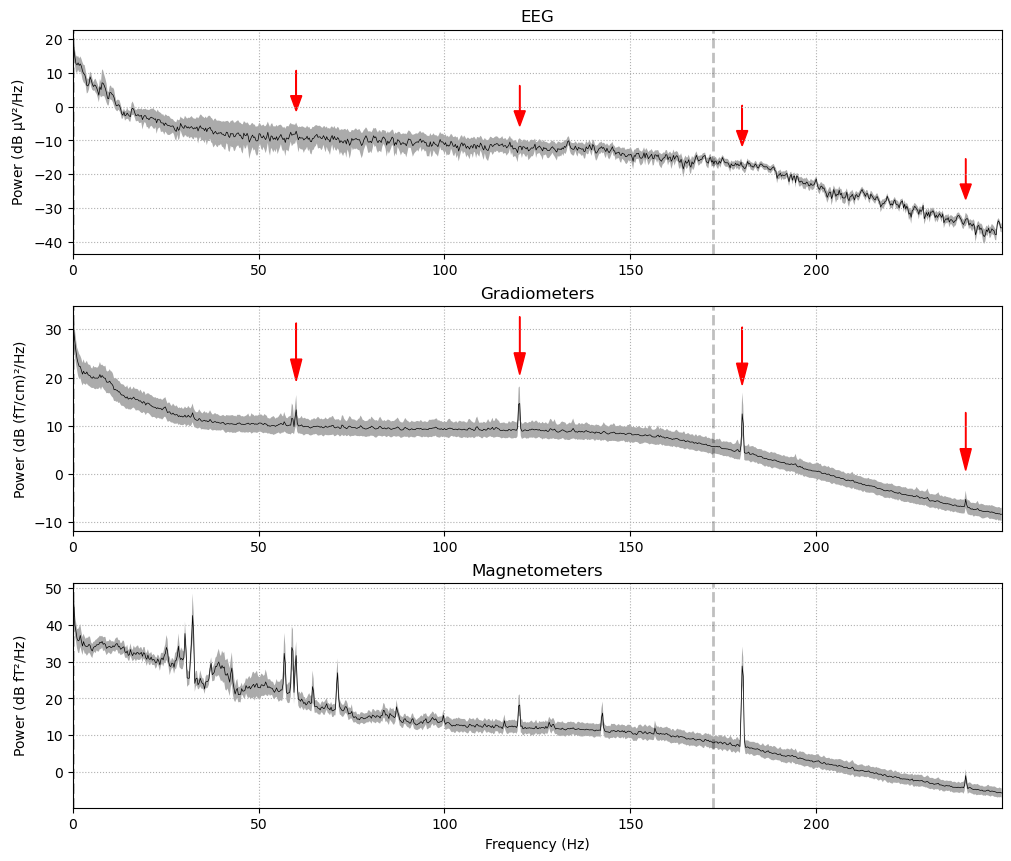

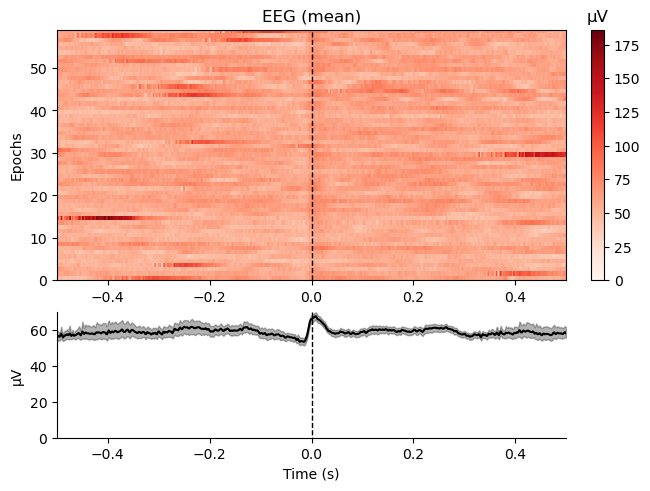

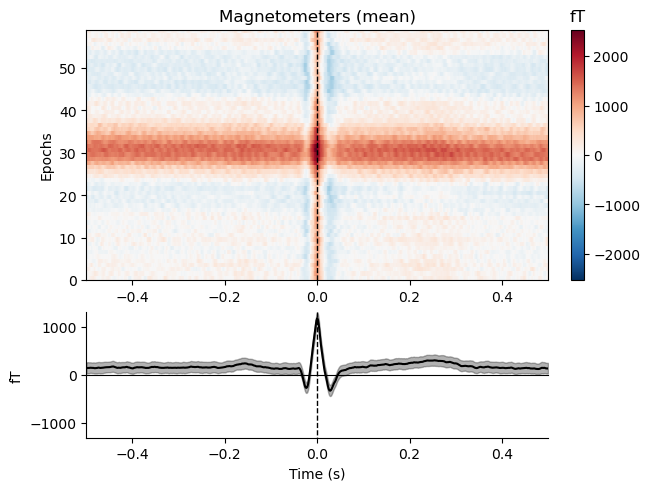

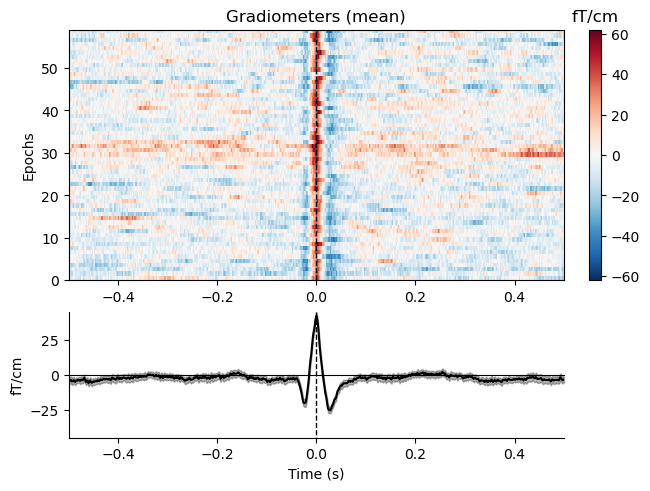

[<Figure size 640x480 with 3 Axes>,
 <Figure size 640x480 with 3 Axes>,
 <Figure size 640x480 with 3 Axes>]

In [25]:
ecg_epochs=mne.preprocessing.create_ecg_epochs(raw)
ecg_epochs.plot_image(combine='mean')
# plt.show()

In [26]:
avg_ecg_epochs=ecg_epochs.average()

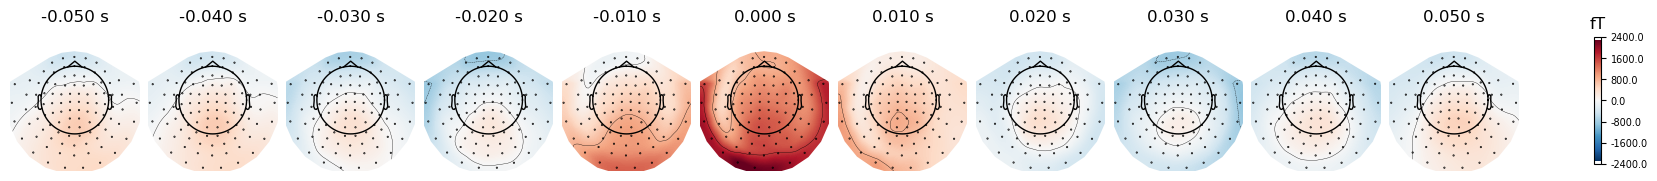

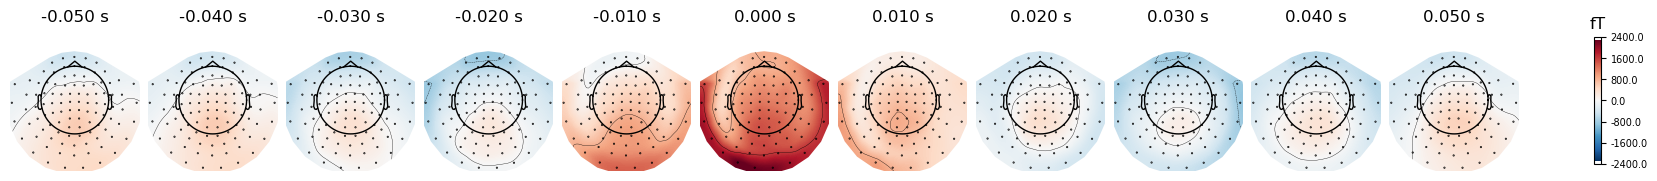

In [27]:
avg_ecg_epochs.plot_topomap(times=np.linspace(-0.05,0.05,11))

Created an SSP operator (subspace dimension = 3)
3 projection items activated
SSP projectors applied...


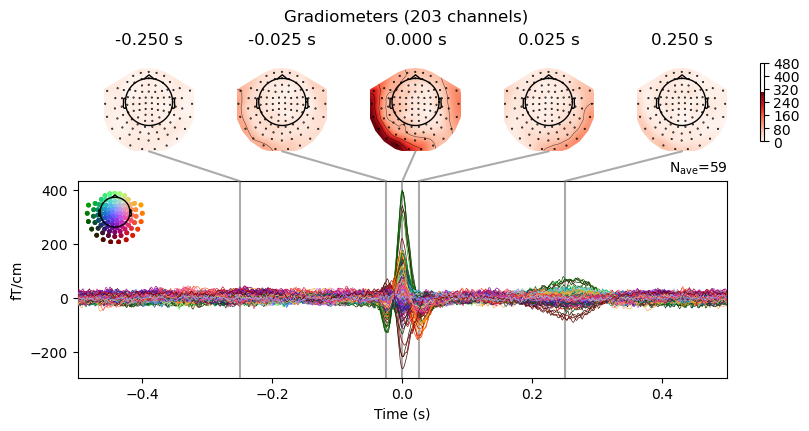

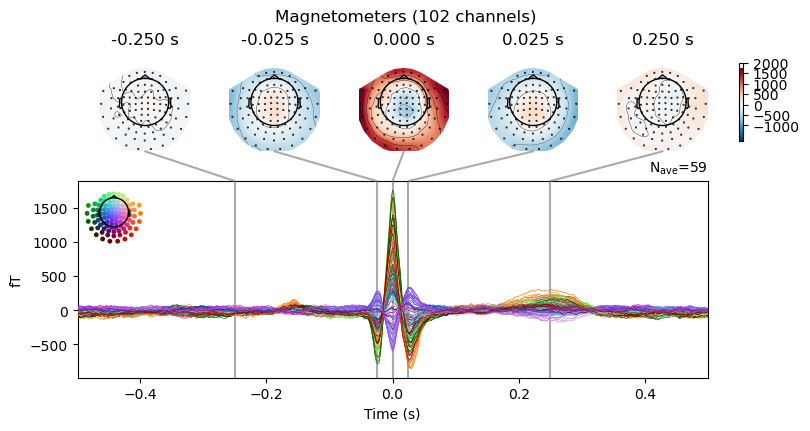

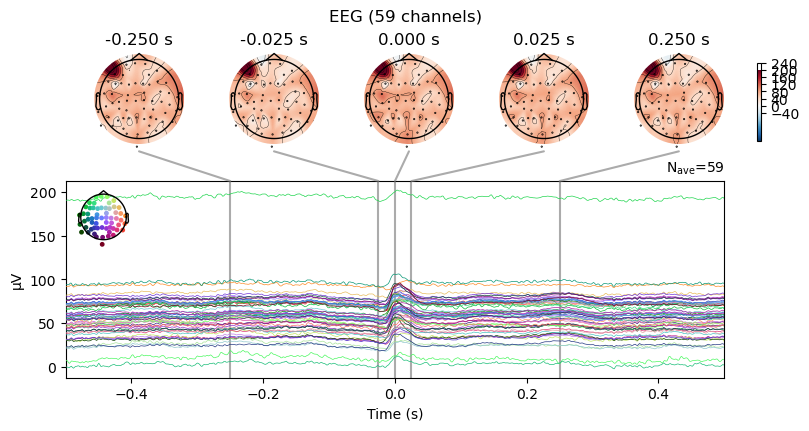

In [28]:
avg_ecg_epochs.plot_joint(times=[-0.25,-0.025,0,0.025,0.25]);

## ocular artifacts(EOG)

Using EOG channel: EOG 061
EOG channel index for this subject is: [375]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel EOG 061 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 6007 samples (10.001 s)

Now detecting blinks and generating corresponding events
Found 10 significant peaks
Number of EOG events detected: 10
Not setting metadata
10 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
Using data from preloaded Raw for 10 events and 601 original t

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


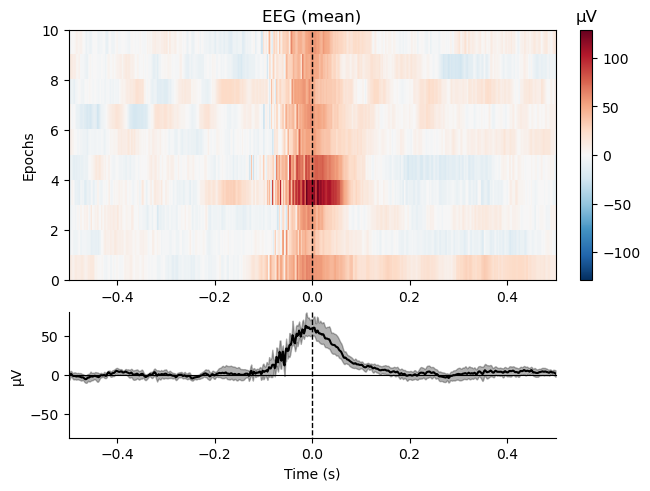

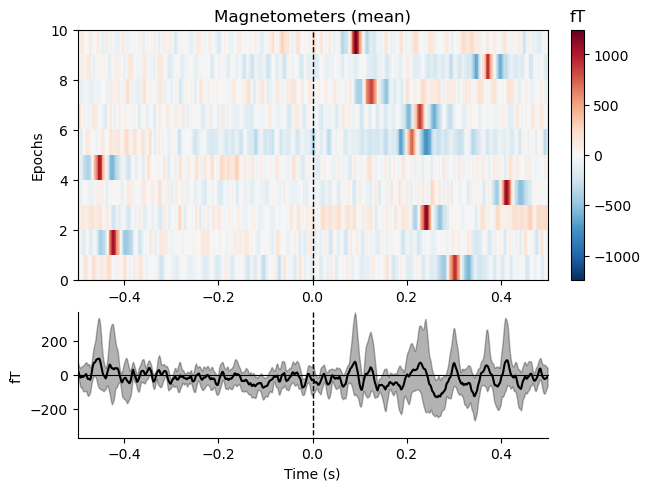

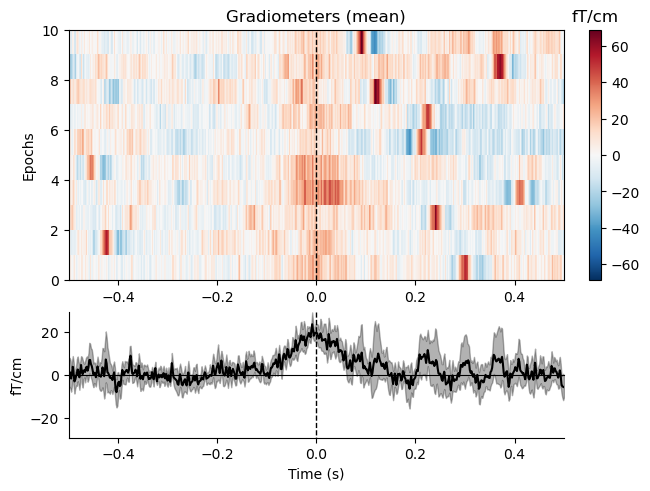

Created an SSP operator (subspace dimension = 3)
3 projection items activated
SSP projectors applied...


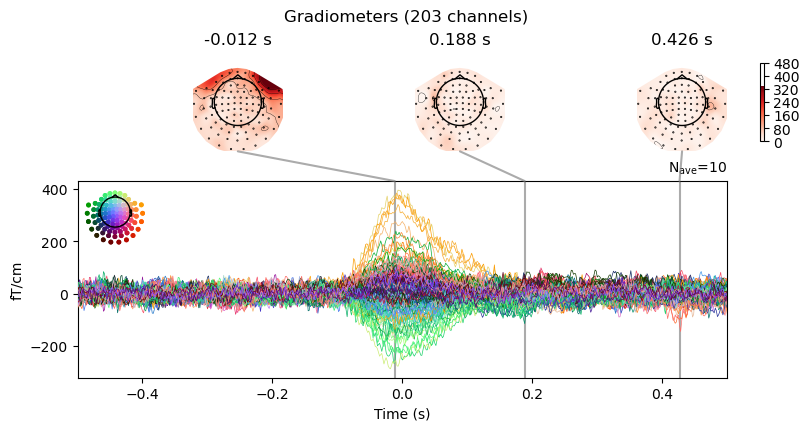

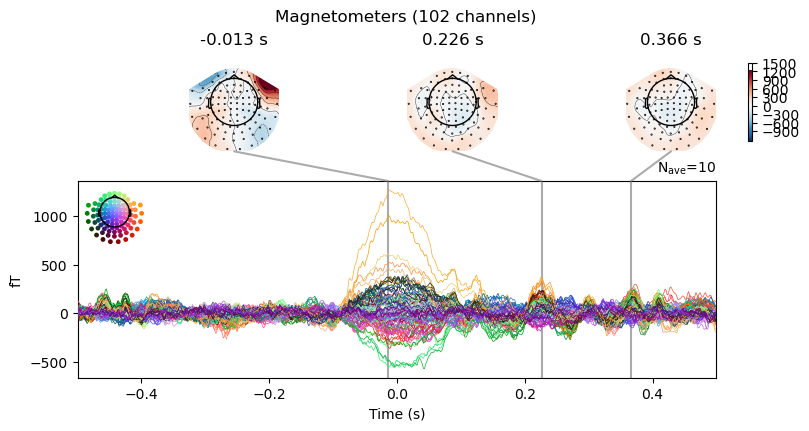

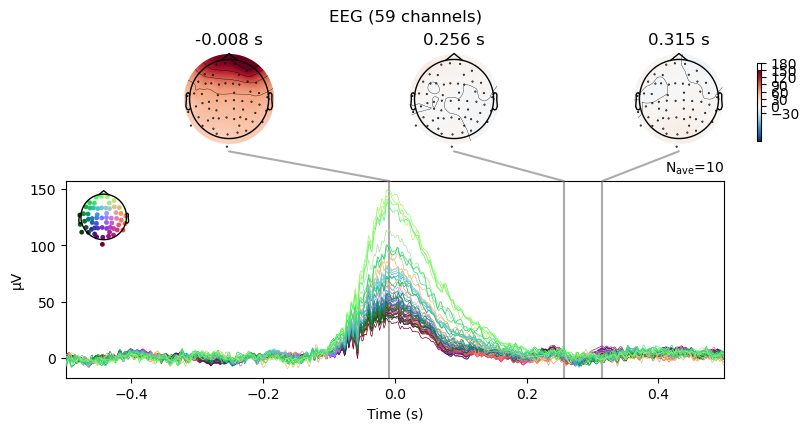

[<Figure size 800x420 with 6 Axes>,
 <Figure size 800x420 with 6 Axes>,
 <Figure size 800x420 with 6 Axes>]

In [29]:
eog_epochs=mne.preprocessing.create_eog_epochs(raw,baseline=(-0.5,-0.2))
eog_epochs.plot_image(combine='mean')
eog_epochs.average().plot_joint()

## filtering and resampling data

In [45]:
import mne 
from mne.datasets import sample

data_path=sample.data_path()
raw_fname=str(data_path)+'/MEG/sample_audvis_raw.fif'

In [46]:
tmin,tmax=0,20
raw=mne.io.read_raw_fif(raw_fname)
raw.crop(tmin,tmax).load_data()

raw.info['bads']=['MEG 2443' ,'EEG 053'] #bads + 2more

Opening raw data file C:\Users\vishw\mne_data\MNE-sample-data/MEG/sample_audvis_raw.fif...


FileNotFoundError: fname does not exist: "C:\Users\vishw\mne_data\MNE-sample-data\MEG\sample_audvis_raw.fif"

## video 4